# ML INTERN at PRODIGY INFOTECH
## Author: Rohit B. Katkar
#### Task 02: create a K-means clustering algorithm to group customers retail store based on their purchase history


Steps to solve the problem :
- Importing Libraries.
- Exploration of data.
- Data Visualization.
- Clustering using K-Means.
- Selection of Clusters.
- Ploting the Cluster Boundry and Clusters.
- 3D Plot of Clusters.

Import all required Libraries

In [71]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go 
import warnings 
warnings.filterwarnings('ignore')

In [72]:
data = pd.read_csv('data/Mall_Customers.csv')

In [73]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
# we drop the column CustomerID beacuse it is unwanted 
data.drop('CustomerID' , axis=1 , inplace=True)

In [75]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [77]:
data.shape

(200, 4)

In [78]:
# change name of column Annual Income (k$), Spending Score (1-100) 
data = data.rename({"Annual Income (k$)" : "Annual_income" , 
             "Spending Score (1-100)" : "Spending_score"} , axis=1)

In [79]:
data.head()

,Gender,Age,Annual_income,Spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [80]:
data.describe()

,Age,Annual_income,Spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Data Preprocessing

In [81]:
# checking is any null value in data or not 
data.isna().sum()

Gender            0
Age               0
Annual_income     0
Spending_score    0
dtype: int64

In [82]:
data.duplicated().sum()

0

- there is 0  duplicate row data in the dataset

## Exploratory Data Analysis (EDA)

In [83]:
px.histogram(data_frame=data ,y=data['Gender'] , color=data['Gender'])

In [84]:
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

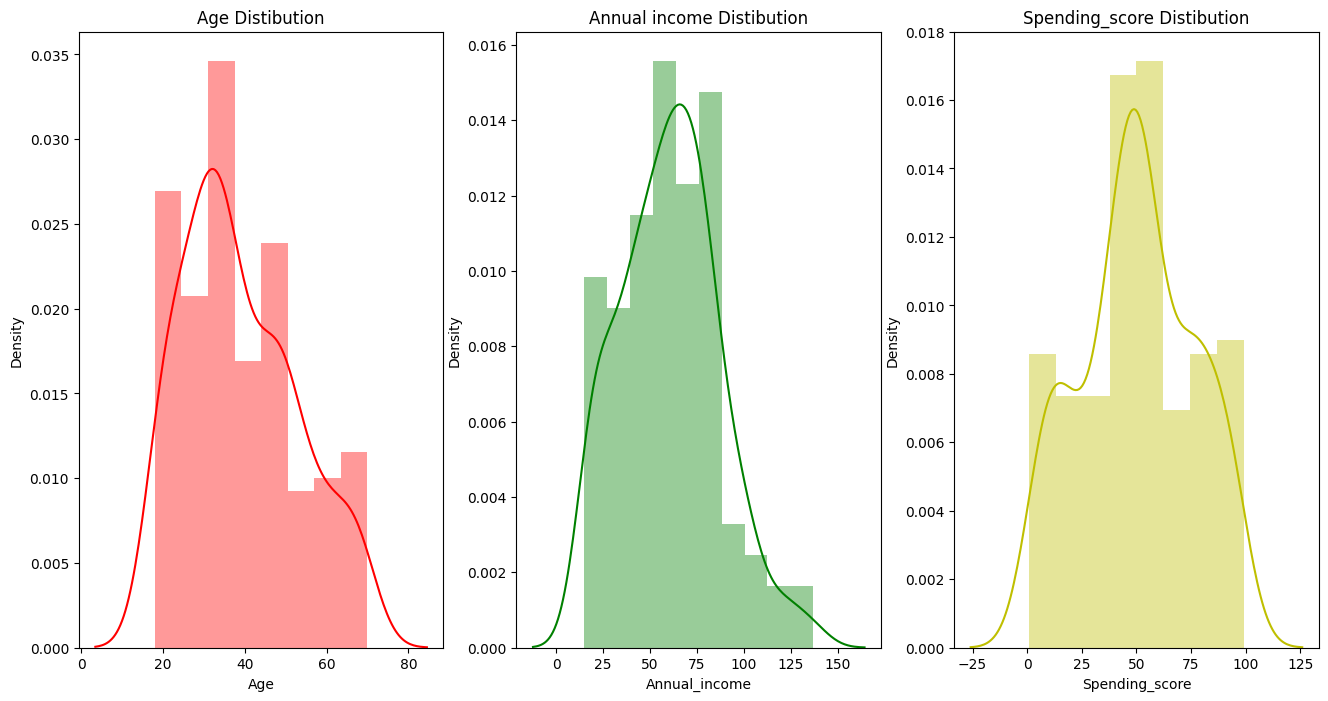

In [85]:
# plotting the distplot to see distribution of data 
plt.figure(figsize=(16 ,8 ))
plt.subplot(1 , 3 , 1)
plt.title("Age Distibution")
sns.distplot(data['Age'] , color="r")
plt.subplot(1 ,3 ,2)
plt.title("Annual income Distibution")
sns.distplot(data['Annual_income'] , color='g')
plt.subplot(1 ,3,3)
plt.title("Spending_score Distibution")
sns.distplot(data['Spending_score'],color='y' )
plt.show()

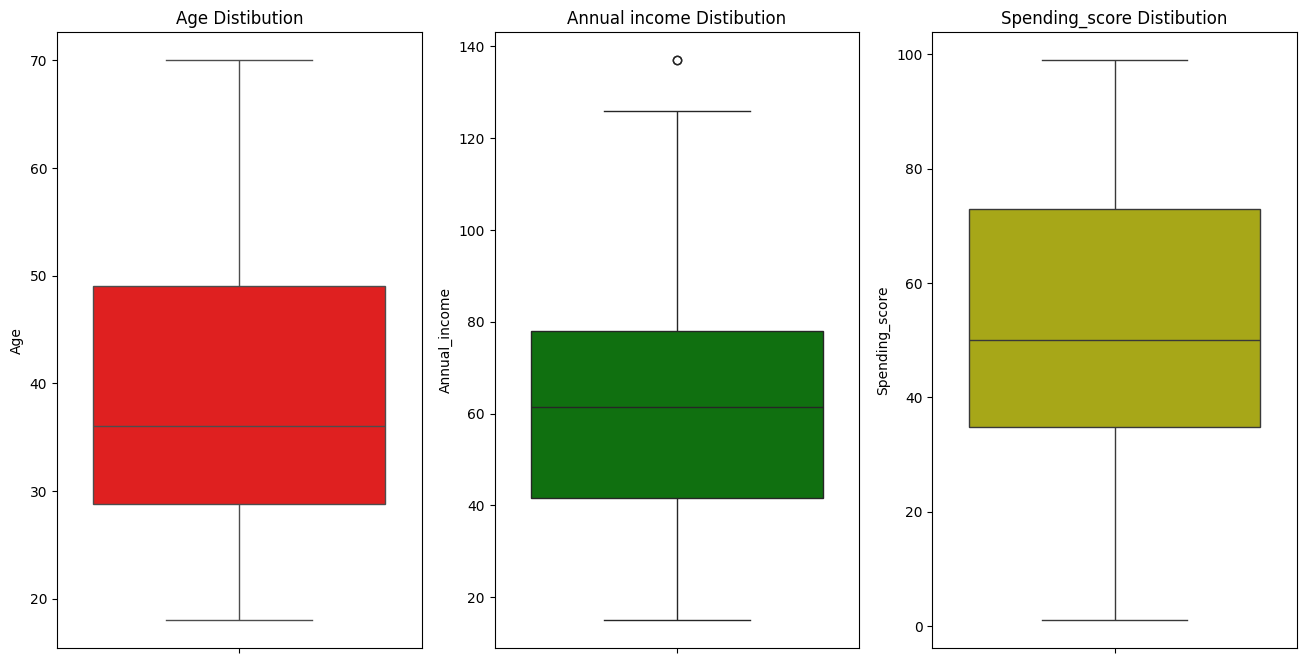

In [86]:
# checking the outliers or not

plt.figure(figsize=(16 ,8 ))
plt.subplot(1 , 3 , 1)
plt.title("Age Distibution")
sns.boxplot(data['Age'] , color="r")
plt.subplot(1 ,3 ,2)
plt.title("Annual income Distibution")
sns.boxplot(data['Annual_income'] , color='g')
plt.subplot(1 ,3,3)
plt.title("Spending_score Distibution")
sns.boxplot(data['Spending_score'],color='y' )
plt.show()

### Bivariate Analysis

In [87]:
# Age vs Annual income with r.s.p to Male


fig = px.scatter(y = data['Age'] , x=data['Annual_income'] , color=data['Gender'],
          title="Age vs Annual income w.r.t Gender" ,size=data['Annual_income'])
fig.update_layout(height=600 , width = 900 , 
                 yaxis_title='Age',
                  xaxis_title='Annual Income')
fig.show()

### Clustering using k-means clustering

In [88]:
data.head()

,Gender,Age,Annual_income,Spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


###  segmentation using Age , Annual_income and Spending_score

In [89]:
from sklearn.cluster import KMeans

In [90]:
temp_df = data[['Age' , 'Annual_income','Spending_score']].iloc[: , :].values
inertia = [] 
for i in range(1 ,11) : 
    model= KMeans(n_clusters=i , max_iter=300 , random_state=42 ) 
    model.fit(temp_df) 
    inertia.append(model.inertia_)

- Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

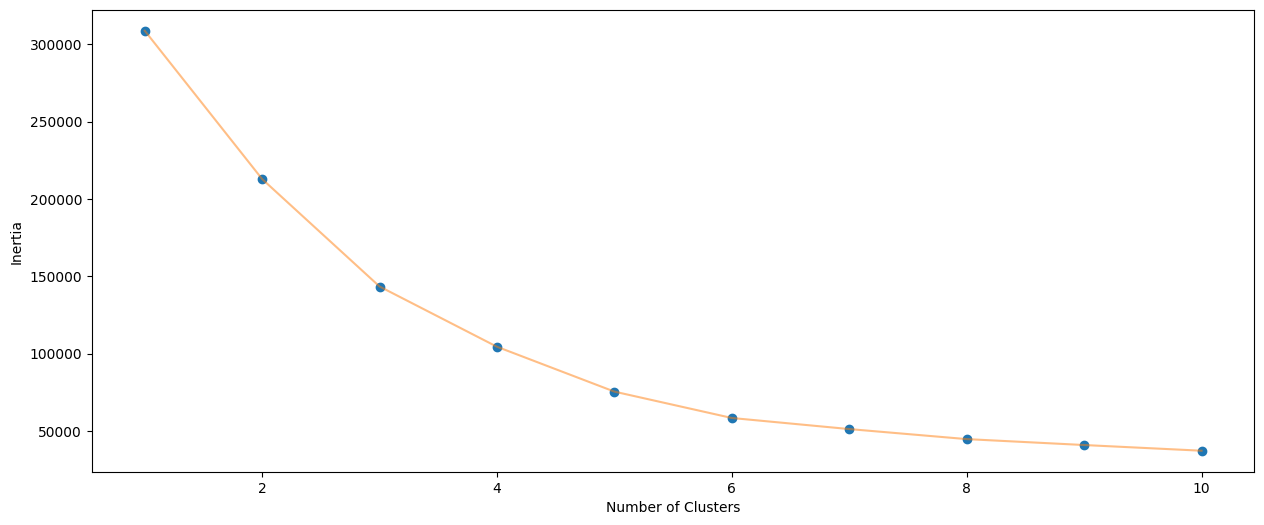

In [91]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [92]:
kmeans = KMeans(n_clusters=6 , max_iter=300 , random_state=42) 
kmeans.fit(temp_df) 


KMeans(n_clusters=6, random_state=42)

In [93]:
labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_

In [94]:
data.head()

,Gender,Age,Annual_income,Spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [95]:
df = data.copy()

In [96]:
df.head()

,Gender,Age,Annual_income,Spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [97]:
import plotly.offline as py
df['label3'] =  labels
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending_score'],
    z= df['Annual_income'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 10,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(

    title= 'custoemrs in Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)